## Library Imports

In [1]:
from decouple import AutoConfig
import os
import pandas as pd
import matplotlib.pyplot as plt

## Functional Imports

In [2]:
from src.video.video_select import select_video
from src.video.video_insert import insert_multiple_video
from src.videos_manifest import list_files_in_directory

from src.comments.comment_select import select_comment
from src.comments.comment_insert import *
from src.comments.comment_parser import *

### Load Manifest Data

In [3]:
videos_manifest_df = pd.read_csv('./../data/raw/raw_videos_manifest.csv')
videos_manifest_filenames = videos_manifest_df["filename"].to_numpy()
video_raw_directory = ".././data/raw/videos/"

comments_manifest_df = pd.read_csv('./../data/raw/raw_comments_manifest.csv')
comments_manifest_filenames = comments_manifest_df["filename"].to_numpy()
comments_manifest_video_ids = comments_manifest_df["video_id"].to_numpy()
comments_raw_directory = ".././data/raw/comments-threads/"

## Configure PostgreSQL Environment Variables

In [4]:
config = AutoConfig(search_path='.')
db_params = {
    "host": "localhost",
    "port": config("DB_PORT"),
    "database": "YouTubeSentimentData",
    "user": config("DB_USER"),
    "password": config("DB_PASSWORD")
}

### Read Data Queries

In [6]:
all_videos = select_video(db_params)
all_comments = select_comment(db_params)

all_videos['columns']

Database connection is closed
Database connection is closed


['video_id',
 'publishedat',
 'channelid',
 'channeltitle',
 'title',
 'description',
 'tags',
 'duration',
 'dimension',
 'definition',
 'caption',
 'licensedcontent',
 'projection',
 'viewcount',
 'likecount',
 'favoritecount',
 'commentcount',
 'topiccategories']

### Insert Comment Query

In [ ]:
comment_threads_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw", "comment-threads")
file_paths = list_file_paths(comment_threads_path, comments_manifest_video_ids, comments_manifest_filenames)

insert_pages_of_comments(file_paths, db_params, return_all_comment_thread_data)

### Insert Videos Query

In [ ]:
insert_multiple_video(db_params, videos_manifest_filenames, video_raw_directory, return_all_video_section_data, parse_all_video_section_data)

### Convert Data to Pandas Dataframes

In [6]:
all_videos_df = pd.DataFrame(all_videos)
all_comments_df = pd.DataFrame(all_comments)

all_videos_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,bxIF9X9k2IE,2023-09-19 12:00:34,UC7cs8q-gJRlGwj4A8OmCmXg,Alex The Analyst,Data Analyst vs Data Scientist | Responsibilit...,Data Scientists and Data Analysts are some of ...,"[Data Analyst, Data Analyst job, Data Analyst ...",PT11M13S,2d,hd,False,True,rectangular,33883,809,0,51.0,"[https://en.wikipedia.org/wiki/Knowledge, http..."
1,fUpChfNN5Uo,2020-06-10 15:49:15,UC7cs8q-gJRlGwj4A8OmCmXg,Alex The Analyst,Data Scientist vs Data Analyst | Which Is Righ...,Data Scientists and Data Analysts are some of ...,"[Data Analyst, How to become a data analyst, D...",PT7M47S,2d,hd,False,True,rectangular,748269,23497,0,851.0,"[https://en.wikipedia.org/wiki/Knowledge, http..."
2,IMU1V-JugKo,2023-05-16 16:18:56,UC7cs8q-gJRlGwj4A8OmCmXg,Alex The Analyst,The Ultimate Data Analytics Career Plan for 20...,Today we’ll unlock “The Ultimate Data Analytic...,"[Data Analyst, Data Analyst job, Data Analyst ...",PT1H10M48S,2d,hd,False,True,rectangular,50828,1724,0,52.0,"[https://en.wikipedia.org/wiki/Knowledge, http..."
3,jVPd7lEvjtg,2021-05-05 15:00:20,UCv83tO5cePwHMt1952IVVHw,James Briggs,Sentence Similarity With Transformers and PyTo...,Easy mode: https://youtu.be/Ey81KfQ3PQU\n\nAll...,[],PT21M10S,2d,hd,False,True,rectangular,16927,398,0,63.0,[https://en.wikipedia.org/wiki/Knowledge]
4,KbVMd9WC7EI,2016-09-20 21:27:59,UCuWhTXXB3KpLrY14VSNJLKQ,Clinton Affair,Clinton Affair - A m b e r,,"[post-vaporwave, 90s, 1991, nostalgia, mtv, th...",PT4M28S,2d,hd,False,False,rectangular,16614,264,0,NaN,[https://en.wikipedia.org/wiki/Electronic_musi...
5,miEFm1CyjfM,2023-03-07 15:07:09,UC8wZnXYK_CGKlBcZp-GxYPA,NeuralNine,PostgreSQL in Python - Crash Course,"In this video, we learn how to use PostgreSQL ...","[postgresql, python, psycopg, psycopg2, python...",PT16M6S,2d,hd,False,True,rectangular,26788,842,0,33.0,"[https://en.wikipedia.org/wiki/Knowledge, http..."
6,NGXnUA_jcfQ,2018-12-12 09:26:01,UCRiFekze9Yx5zDDjAVrYvbg,Papa Roach - Topic,Be Free,Provided to YouTube by Universal Music Group\n...,"[Papa Roach, パパローチ, パパ・ローチ, Getting Away With ...",PT3M18S,2d,hd,False,True,rectangular,644320,7419,0,21.0,"[https://en.wikipedia.org/wiki/Music, https://..."
7,T8UXgR-EtoM,2023-10-13 12:00:32,UC8wZnXYK_CGKlBcZp-GxYPA,NeuralNine,What's New in Python 3.12?,Today we discuss what is new in Python 3.12.\n...,"[python, python 3.12, 3.12, new update, new ve...",PT14M36S,2d,hd,False,True,rectangular,9366,411,0,19.0,"[https://en.wikipedia.org/wiki/Knowledge, http..."
8,tBfIh3VQX2o,2022-06-10 18:19:05,UCLLw7jmFsvfIVaUFsLs8mlQ,Luke Barousse,How I use Math as a Data Analyst,Statistics & Probability Course for Data Analy...,"[data viz by luke, business intelligence, data...",PT10M6S,2d,hd,False,True,rectangular,97266,4464,0,298.0,"[https://en.wikipedia.org/wiki/Knowledge, http..."
9,ubOhA56G_tk,2023-02-14 00:54:35,UCyQrL08LlvUHcl6snYDfo7g,introvertedmadness,The Complete Guide to Getting a Tech Job,we live in a society\n\n\n\ni have missed u al...,"[career in tech, tech careers, casually explai...",PT9M59S,2d,hd,False,True,rectangular,603143,36298,0,1315.0,[https://en.wikipedia.org/wiki/Knowledge]


# Feature Engineering

### Add Upload Year Column

In [23]:
all_videos_df["uploadDate"] = pd.to_datetime(all_videos_df[1])
all_videos_df["Year"] = all_videos_df["uploadDate"].dt.year

# Plots

### Frequency of Year Upload Plot

<AxesSubplot: title={'center': 'Upload Frequency by Year'}, xlabel='Year', ylabel='Upload Frequency'>

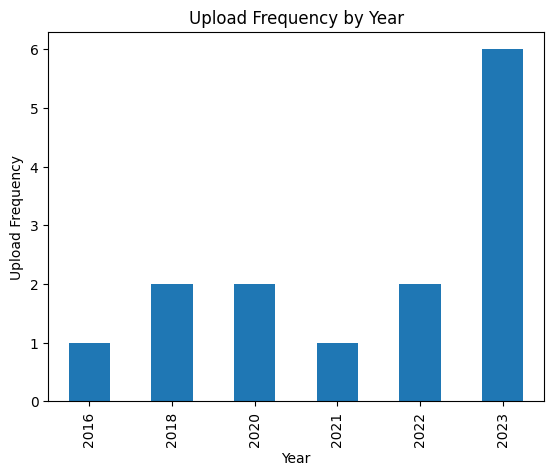

In [20]:
yearly_counts = all_videos_df["Year"].value_counts().sort_index()
yearly_counts.plot(kind="bar", xlabel="Year", ylabel="Upload Frequency", title="Upload Frequency by Year")

### Frequency of Comment Like Plot

<AxesSubplot: title={'center': 'Frequency of Count of Likes'}, xlabel='Count of Likes', ylabel='Frequency'>

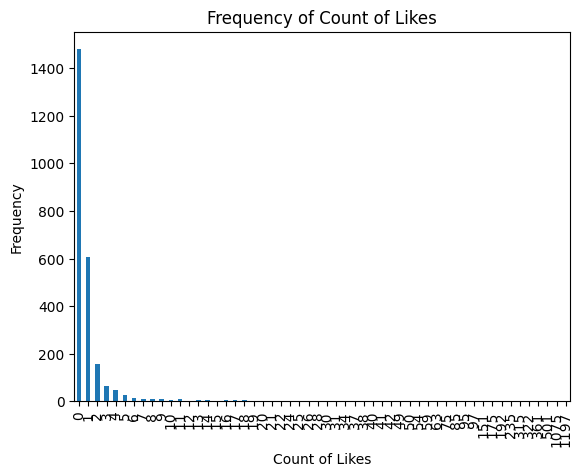

In [46]:
like_counts = all_comments_df[12].value_counts().sort_index()
like_counts.plot(kind="bar", xlabel="Count of Likes", ylabel="Frequency", title="Frequency of Count of Likes")

In [ ]:
# FROM POSTGRES DATABASE
#tags_corpus = create_tags_corpus(db_params, "../sql/video/video_read_tags.SQL")
#print(tags_corpus)